<a href="https://colab.research.google.com/github/dave502/course.numpy-pandas/blob/main/homework_04/hw8_task1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE

%matplotlib inline

boston = load_boston()

X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


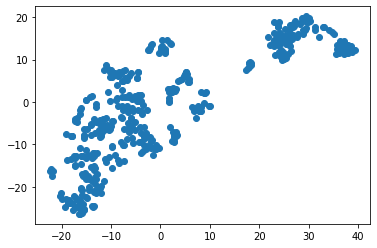

In [2]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

##Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [48]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=3, random_state=42, max_iter=100)
train_labels = km_model.fit_predict(X_train_scaled)


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

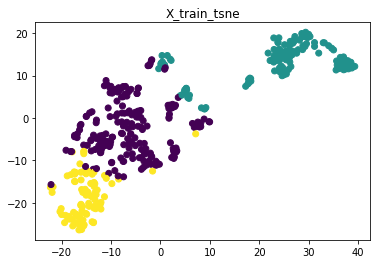

In [7]:
centers = km_model.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.title('X_train_tsne')
plt.show()


In [13]:
type(X_train.CRIM)

pandas.core.series.Series

Вычислите средние значения price и CRIM в разных кластерах.

In [56]:
print("Среднее значение CRIM всех данных = {}".format(X_train.CRIM.mean()))
for i in range(0,3):
  print("Среднее значение CRIM кластера {} = {}".format(i, X_train.CRIM[train_labels == i].mean()))

Среднее значение CRIM всех данных = 3.609124628712873
Среднее значение CRIM кластера 0 = 0.42166020942408367
Среднее значение CRIM кластера 1 = 10.797028425196853
Среднее значение CRIM кластера 2 = 0.07356558139534886


In [57]:
print("Среднее значение price всех данных = {:9.3f}".format(y_train.price.mean()))
for i in range(0,3):
  print("Среднее значение price кластера {} = {:9.3f}".format(i, y_train.price[train_labels == i].mean()))

Среднее значение price всех данных =    22.797
Среднее значение price кластера 0 =    24.958
Среднее значение price кластера 1 =    16.165
Среднее значение price кластера 2 =    27.788


##Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [52]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
test_labels = km_model.predict(X_test_scaled)

In [58]:
print("Среднее значение CRIM всех тестовых данных = {:9.3f}".format(X_test.CRIM.mean()))
for i in range(0,3):
  print("Среднее значение CRIM кластера {} = {:9.3f}".format(i, X_test.CRIM[test_labels == i].mean()))
print('\n')
print("Среднее значение price всех тестовых данных = {:9.3f}".format(y_test.price.mean()))
for i in range(0,3):
  print("Среднее значение price кластера {} = {:9.3f}".format(i, y_test.price[test_labels == i].mean()))

Среднее значение CRIM всех тестовых данных =     3.631
Среднее значение CRIM кластера 0 =     0.266
Среднее значение CRIM кластера 1 =    10.166
Среднее значение CRIM кластера 2 =     0.062


Среднее значение price всех тестовых данных =    21.488
Среднее значение price кластера 0 =    21.861
Среднее значение price кластера 1 =    16.437
Среднее значение price кластера 2 =    31.350
